# Mapping out house prices in California
Importing housing data and creating a colored map showing the price differences across the state of California. Additionally, we are calculating correlations for house prices and other factors, such as house income and median house age.  

In [1]:
import numpy as np
import pandas as pd

# https://github.com/killakalle/ageron_handson-ml/blob/master/datasets/housing/housing.csv

HOUSING_URL = r'/Users/ChristianBarrera//anaconda/Data_Analytics_Science/Data-Analytics/datasets/housing/housing.csv'
housing = pd.read_csv(HOUSING_URL)

We must clean the data in order to make a map that tells a story. Much of the data caps out at a median house value of 500,001 which distorts our results.  While it's a significant portion, we must cut the data with values > 500,001, 450,000, and 350,000 because of how the data is setup so we can obtain results as accurate as possible.  

In [2]:
housing = housing[housing['median_house_value'] < 500001]
housing = housing[housing['median_house_value'] != 450000]
housing = housing[housing['median_house_value'] != 350000]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     8544
INLAND        6519
NEAR OCEAN    2425
NEAR BAY      2068
ISLAND           3
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19559.000000,19559.000000,19559.000000,19559.000000,19359.000000,19559.000000,19559.000000,19559.000000,19559.000000
mean,-119.559997,35.651897,28.361879,2625.603610,540.163490,1443.108952,501.705915,3.677673,191354.522010
std,2.005798,2.151287,12.493399,2184.492811,422.595577,1143.897711,383.386003,1.566626,96836.030256
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1442.000000,298.000000,799.000000,282.000000,2.530050,116200.000000
50%,-118.500000,34.270000,28.000000,2114.000000,437.000000,1181.000000,411.000000,3.451400,173100.000000
75%,-117.990000,37.730000,37.000000,3124.500000,648.000000,1748.500000,606.000000,4.583300,246400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


Now that much of the data has been cleaned, we can plot some bar graphs showing the distributions of the various categories.  

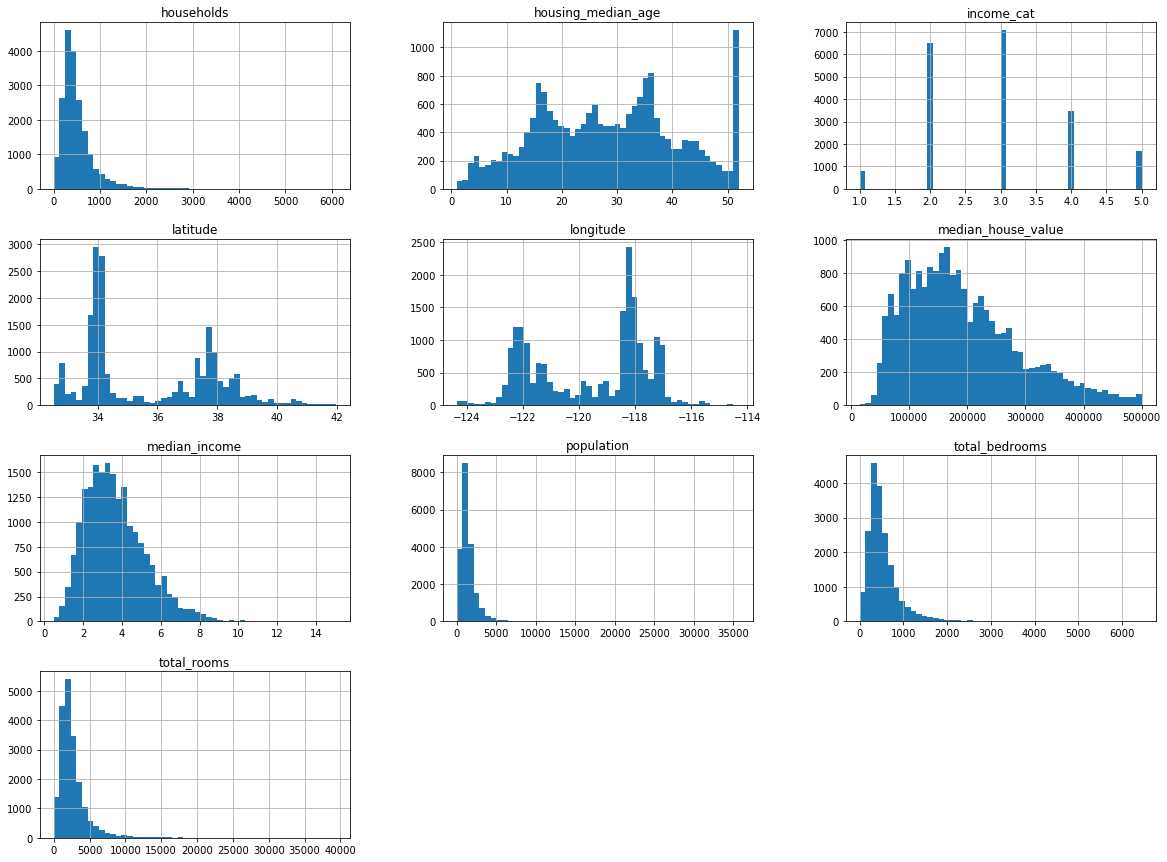

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing.hist(bins=50, figsize=(20,15))
plt.show()

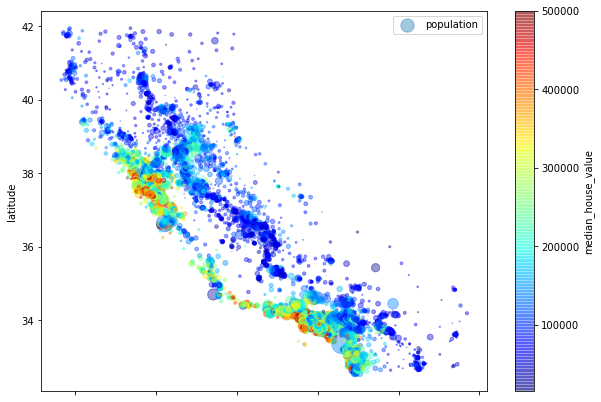

In [6]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, # adds the color gradient
        )
plt.legend()

As shown in the graph above, the most expensive areas in California are San Francisco and Los Angeles.  Ocean proximity is also another huge factor in terms of house value. In the map, there's quite a number of high valued houses (warm colors) hugging the west coast of the state.

In [7]:
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.655196
income_cat            0.623362
total_rooms           0.150182
households            0.098867
total_bedrooms        0.078078
housing_median_age    0.065413
population            0.016159
longitude            -0.044433
latitude             -0.150073
Name: median_house_value, dtype: float64


/Users/ChristianBarrera/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116a891d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11602d128>]], dtype=object)

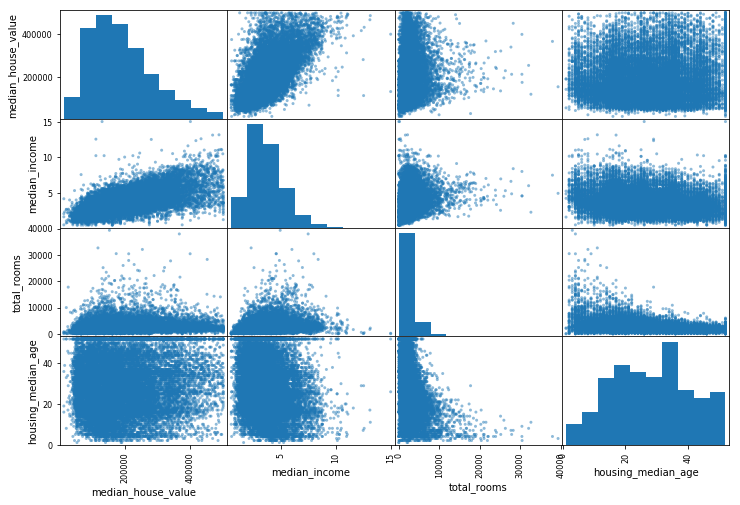

In [8]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

In the above scatter plots, correlations can be seen between the various categories, with median_house_prices and median_income the highest correlated, which is exc

In [9]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]